# Interpolation transform

**Purpose of script:**

Convert the microwave data (netCDF or tif) and upscale to match the resoltion of the optical dataset
using the xarray.interp() method

- In: wm tif data, opt data
- Out: mw upscaled tif data


## Prep

Imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import rioxarray
import xarray
import rasterio
import gdal

%matplotlib inline

Relevant paths:

In [9]:
mw_path = r"../Data/microwave-rs/mw-tif"
opt_path = r"../Data/optical-rs/2019-07-01_grain_diameter.tif"

In [ ]:
mw_interpolated_out =  r"../Data/microwave-rs/mw_interpolated"

Data load:

In [ ]:
# load opt cropped data
# load mw tif data

In [10]:
data_opt = xarray.open_dataarray(opt_path)

In [ ]:
# load all tiff files

In [ ]:
# tfs_opt = [os.path.join(opt_dir_path, f) for f in os.listdir(opt_dir_path) if f.endswith(".tif")]	
# data_opt = []
# for f in tfs_opt:
#     data_opt.append(rioxarray.open_rasterio(f, masked=True))

Interpolation:

In [11]:
x_new = data_opt['x']
y_new = data_opt['y']

In [3]:
# for each tif file

# load 1 only for now:

mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-01_mw.tif"
data_mw_tif = xarray.open_dataarray(mw_path_tif)


In [12]:
test3 = data_mw_tif.interp(x=x_new, y=y_new, method="nearest")

Drop nan:

In [ ]:
test3.dropna(dim="band", how="any") # nope

In [30]:
test3[0].shape

(2687, 1487)

In [40]:
test3[0][:-23, :-23]

<xarray.DataArray 'band_data' (y: 2664, x: 1464)>
array([[ 0.,  0.,  0., ..., -1., nan, nan],
       [ 0.,  0.,  0., ..., -1., nan, nan],
       [ 0.,  0.,  0., ..., -1., nan, nan],
       ...,
       [-1., -1., -1., ..., -1., nan, nan],
       [-1., -1., -1., ..., -1., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
  * x            (x) float64 -6.365e+05 -6.355e+05 ... 8.255e+05 8.265e+05
  * y            (y) float64 -6.625e+05 -6.635e+05 ... -3.324e+06 -3.326e+06
Attributes:
    AREA_OR_POINT:  Area

In [39]:
np.isnan(test3[0][:, 0]).sum()

<xarray.DataArray 'band_data' ()>
array(24)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
    x            float64 -6.365e+05

In [38]:
np.isnan(test3[0][0]).sum()

<xarray.DataArray 'band_data' ()>
array(25)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
    y            float64 -6.625e+05

In [22]:
test3.drop(band=np.nan)

<xarray.DataArray 'band_data' (band: 1, y: 2687, x: 1487)>
array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 -6.365e+05 -6.355e+05 ... 8.485e+05 8.495e+05
  * y            (y) float64 -6.625e+05 -6.635e+05 ... -3.348e+06 -3.348e+06
Dimensions without coordinates: band
Attributes:
    AREA_OR_POINT:  Area

Plot:

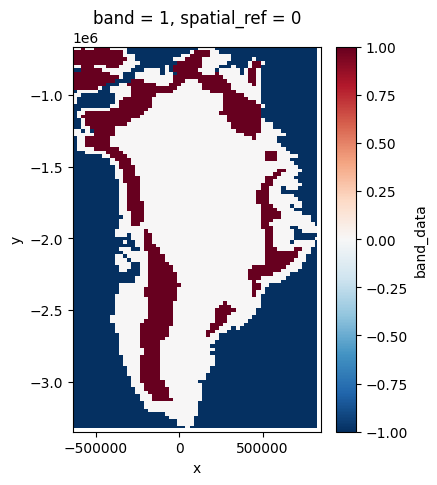

In [34]:
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test3.plot(ax=axes)
plt.draw()

In [ ]:
# next script - put to dataset